In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

In [84]:
#Importing requires libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

## Data Loading

In [85]:
# Loading the dataset from the provided file
data_path = "/content/drive/MyDrive/Colab_Notebooks/INDU-6611/AS1/Data_affected area_modified.csv"
data = pd.read_csv(data_path)

After loading, it's a good practice to view the first few rows of the dataset to understand its structure.

In [86]:
# Displaying the first few rows of the dataset
data.head(11)

,X,Y,month,day,A,B,C,D,temp,RH,wind,rain,area
0,7,5.0,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4.0,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4.0,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6.0,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6.0,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0
5,8,6.0,aug,sun,92.3,85.3,488.0,14.7,22.2,29.0,5.4,0.0,0.0
6,8,6.0,aug,mon,92.3,88.9,495.6,8.5,24.1,27.0,3.1,0.0,0.0
7,8,6.0,aug,mon,91.5,145.4,608.2,10.7,8.0,86.0,2.2,0.0,0.0
8,8,6.0,sep,tue,91.0,129.5,692.6,7.0,13.1,63.0,5.4,0.0,0.0
9,7,5.0,sep,sat,92.5,88.0,698.6,7.1,22.8,40.0,4.0,0.0,0.0


Summary of the Dataset

In [87]:
data_summary = data.describe()
data_summary

,X,Y,A,B,C,D,temp,RH,wind,rain,area
count,517.000000,515.000000,515.000000,517.000000,517.000000,517.000000,517.000000,516.000000,517.000000,517.000000,517.000000
mean,4.953578,4.295146,90.594369,110.872340,547.940039,9.021663,18.889168,44.635659,4.017602,0.021663,12.847292
std,5.256758,1.229610,10.530928,64.046482,248.066192,4.559477,5.806625,17.682832,1.791653,0.295959,63.655818
min,1.000000,2.000000,0.000000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.250000,4.900000,0.000000,6.570000
max,90.000000,9.000000,250.000000,291.300000,860.600000,56.100000,33.300000,200.000000,9.400000,6.400000,1090.840000


## Data Preprocessing

Data preprocessing involves several steps, including handling missing values, removing outliers, and possibly normalizing or scaling. For this dataset, we've imputed missing values using the median and removed known outliers.

Cheacking for outliers

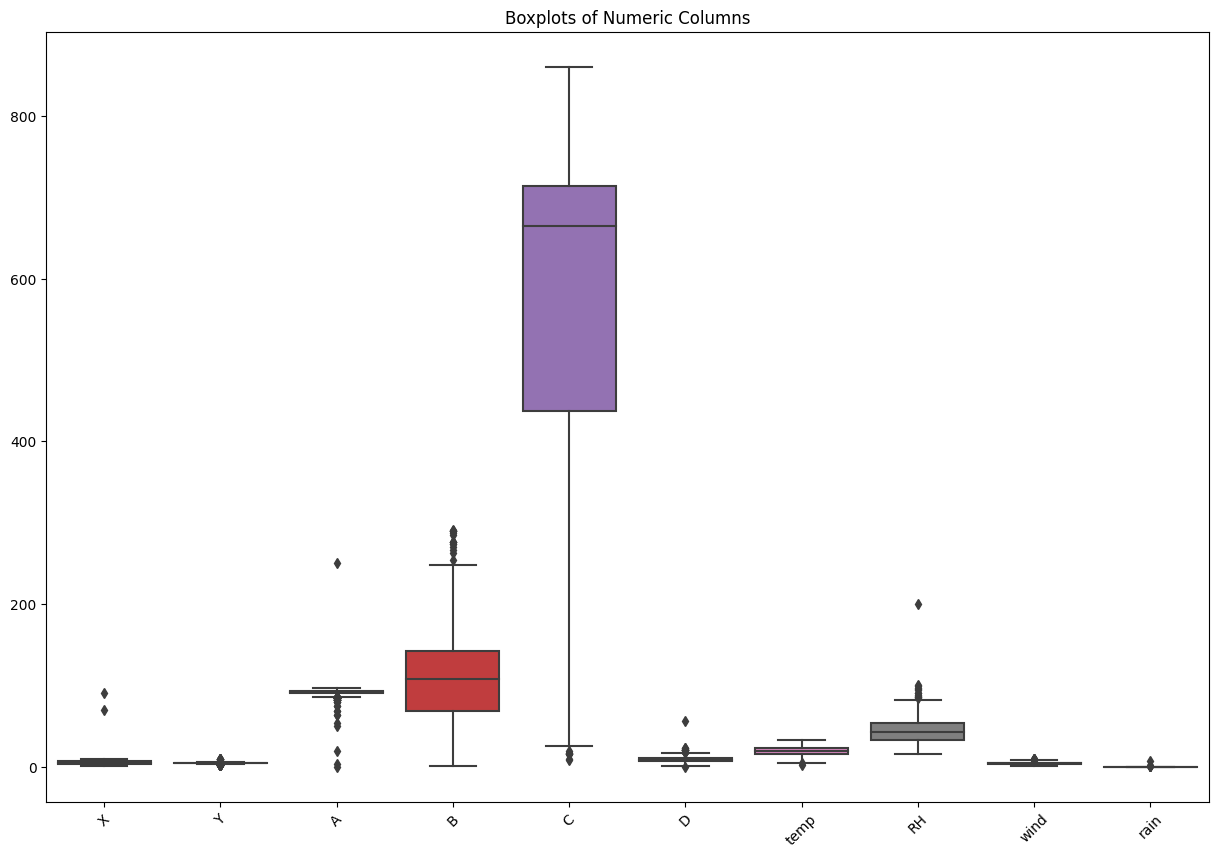

In [88]:
# List of numeric columns to check for outliers
numeric_cols = ['X', 'Y', 'A', 'B', 'C', 'D', 'temp', 'RH', 'wind', 'rain']

# Plotting boxplots for each numeric column
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of Numeric Columns")
plt.show()

Finding Outliers using IQR

In [89]:
# List of columns to check for outliers
columns_to_check = ['X', 'Y', 'A', 'B', 'C', 'D', 'temp', 'RH', 'wind', 'rain']

# Dictionary to store outlier details
outliers_details_dict = {}

# Loop through each column to find outliers and their row numbers
for col in columns_to_check:
    Q1 = data_summary.at['25%', col]
    Q3 = data_summary.at['75%', col]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get row numbers (indices) of outliers
    outliers_below_indices = data[data[col] < lower_bound].index.tolist()
    outliers_above_indices = data[data[col] > upper_bound].index.tolist()

    # Store details
    outliers_details_dict[col] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Below Indices': outliers_below_indices,
        'Outliers Above Indices': outliers_above_indices
    }

# Convert the dictionary to a DataFrame for better visualization
outliers_details_df = pd.DataFrame(outliers_details_dict).transpose()

outliers_details_df


,Lower Bound,Upper Bound,Outliers Below Indices,Outliers Above Indices
X,-3.0,13.0,[],"[16, 164]"
Y,2.5,6.5,"[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 7...","[75, 76, 138, 151, 402, 420, 480]"
A,86.15,96.95,"[12, 17, 40, 58, 75, 96, 97, 104, 105, 110, 11...",[208]
B,-42.1,253.1,[],"[369, 370, 374, 384, 392, 406, 408, 422, 430, ..."
C,23.4,1128.2,"[97, 104, 239, 283, 284, 463, 464, 465]",[]
D,0.05,17.25,[379],"[11, 22, 24, 133, 135, 149, 206, 209, 211, 266..."
temp,4.55,33.75,"[280, 282]",[]
RH,2.625,83.625,[],"[3, 4, 7, 15, 98, 211, 261, 286, 299, 304, 335..."
wind,-0.6,8.2,[],"[142, 162, 168, 273, 276, 277, 278, 279, 281, ..."
rain,0.0,0.0,[],"[3, 243, 286, 499, 500, 501, 502, 509]"


In [90]:
# Extract all outlier indices from the details DataFrame
all_outlier_indices = []

for col in columns_to_check:
    all_outlier_indices.extend(outliers_details_df.at[col, 'Outliers Below Indices'])
    all_outlier_indices.extend(outliers_details_df.at[col, 'Outliers Above Indices'])

# Deduplicate the list to get unique row indices
unique_outlier_indices = list(set(all_outlier_indices))

# Count the number of unique row indices
num_rows_to_remove = len(unique_outlier_indices)

num_rows_to_remove

163

If we proceed with this we will have to remove 155 rows, i.e. ~ 29% of the total rows. This will affect the datset and is not feasible.

Finding Outliers using given data

In [91]:
data[(data['X'] > 9) |(data['X'] < 1)]

,X,Y,month,day,A,B,C,D,temp,RH,wind,rain,area
16,90,5.0,mar,sat,91.7,35.8,80.8,7.8,15.1,27.0,5.4,0.0,0.00
164,70,5.0,sep,sun,89.7,90.0,704.4,4.8,17.8,67.0,2.2,0.0,2.01


In [18]:
data[(data['A'] > 96.20) |(data['A'] < 18.7)]

,X,Y,month,day,A,B,C,D,temp,RH,wind,rain,area
113,3,4.0,sep,mon,0.0,78.5,724.3,9.2,18.9,35.0,2.7,0.0,0.00
208,6,5.0,sep,fri,250.0,117.9,668.0,12.2,19.6,33.0,6.3,0.0,19.23
367,4,5.0,sep,tue,3.0,132.3,812.1,12.5,16.4,27.0,3.6,0.0,0.00


In [92]:
data[(data['RH'] > 100) |(data['RH'] < 15)]

,X,Y,month,day,A,B,C,D,temp,RH,wind,rain,area
15,6,5.0,sep,fri,93.3,141.2,713.9,13.9,22.9,200.0,5.4,0.0,0.0


Here we first identified specific rows, by indexing, that we have considered outliers and needs to be removed. Those rows are are stored in seprate list and then droped.

In [93]:
# Checking and Imputing missing values
data['Y'].fillna(data['Y'].median(), inplace=True)
data['A'].fillna(data['A'].median(), inplace=True)
data['RH'].fillna(data['RH'].median(), inplace=True)

# Removing outliers for specific columns
rows_to_remove_X = [16, 164]
rows_to_remove_A = [113, 208, 367]
rows_to_remove_RH = [15]
data = data.drop(rows_to_remove_X + rows_to_remove_A + rows_to_remove_RH)

# Reset the index after removing rows (optional)
data = data.reset_index(drop=True)

## Exploratory Data Analysis (EDA)

EDA helps in understanding the data's underlying structure, trends, and patterns. The heatmap above shows the correlation between different features.

<ipython-input-94-a3801e88136a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


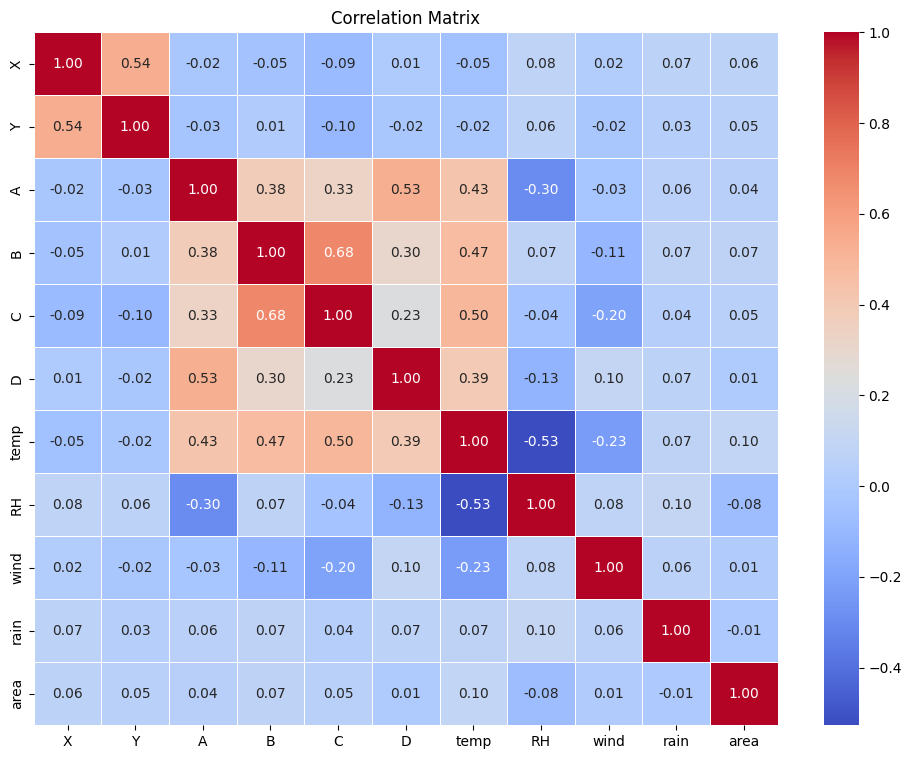

In [94]:
# Compute correlation matrix and plot the heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

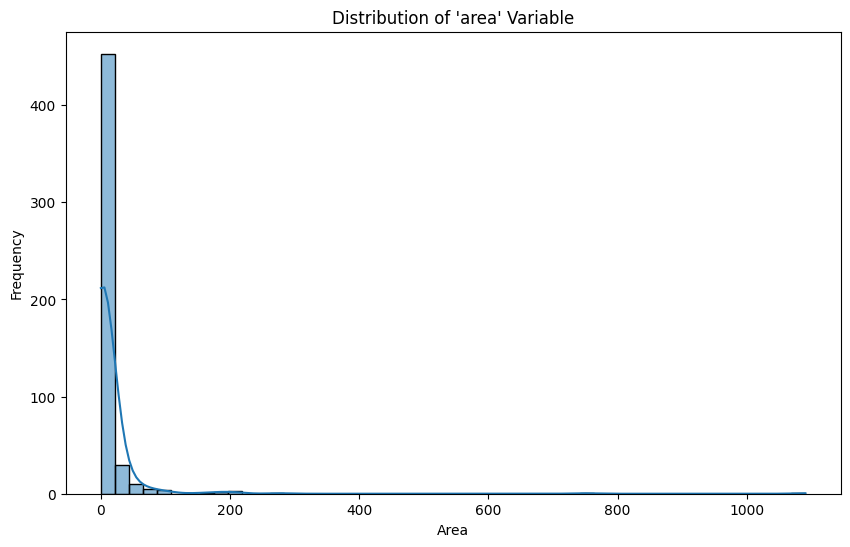

In [95]:
# Plotting a histogram to show the distribution of the 'area' variable
plt.figure(figsize=(10, 6))
sns.histplot(data['area'], kde=True, bins=50)
plt.title("Distribution of 'area' Variable")
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.show()

The histogram above displays the distribution of the 'area' variable. As we can see, the majority of the values are clustered towards the lower end, with a few larger values causing a long tail to the right. This right-skewed distribution indicates that the 'area' variable is positively skewed.

## Feature Engineering

Feature engineering transforms raw data into a format that is better suited for modeling. For this dataset, we've encoded categorical variables like month and day.

In [96]:
# Encoding categorical variables
data_encoded = pd.get_dummies(data, columns=['month', 'day'], drop_first=True)
data_final = data_encoded.drop('area', axis=1)
area = data_encoded['area']

## Data Splitting, Scaling, and Model Building & Evaluation

The train_test_split function from sklearn divides the dataset, represented by data_final and area, into training (80%) and test sets (20%). The split is reproducible due to the random_state=0. For feature standardization, the StandardScaler removes the mean and scales features to unit variance, essential for many algorithms. The fit_transform method scales the training data using its mean and standard deviation, while the test data is scaled using only the transform method to avoid data leakage, ensuring genuine model performance evaluation.

In [40]:
#Spliting the data for train and test
data_train, data_test, area_train, area_test = train_test_split(data_final, area, test_size=0.2, random_state=0)

# Initialize the scaler
scaler = StandardScaler()

# Use fit_transform on the training data
data_train_scaled = scaler.fit_transform(data_train)

# Use only transform on the test data
data_test_scaled = scaler.transform(data_test)

The code trains a linear regression model on scaled training data and then predicts values on the scaled test data, storing results in area_pred.

In [97]:
# Building the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(data_train_scaled, area_train)

# Predicting on the test set
area_pred = linear_reg.predict(data_test_scaled)

The values obtained are very absured. This is because the data is right-skewed distribution and indicates that the 'area' variable is positively skewed. We will have to apply log transformation to make this distribution more symmetrical.

In [98]:
# Calculate RMSE and R^2 for the model
rmse = mean_squared_error(area_test, area_pred, squared=False)
r2 = r2_score(area_test, area_pred)

print(f"RMSE: {rmse}, R^2: {r2}")

RMSE: 110.08073124819032, R^2: 0.007846356836619384


Now using MinMaxScaler and Log Trasformation

The code initializes a MinMaxScaler from sklearn, which scales features to lie between 0 and 1. The training data (data_train) is then scaled using the fit_transform method, which determines the minimum and maximum values of each feature and scales them accordingly. The test data (data_test) is scaled using the transform method to ensure it's transformed using the same minimum and maximum values derived from the training data.

In [99]:
# Scaling data with MinMaxScaler
min_max_scaler = MinMaxScaler()
data_train_scaled = min_max_scaler.fit_transform(data_train)
data_test_scaled = min_max_scaler.transform(data_test)

The code applies a log transformation to the 'area' variable using np.log1p to address its skewness. The dataset is then split into training and test sets with an 80-20 ratio. A linear regression model is initialized and trained on the scaled training data and the log-transformed 'area'.

In [100]:
# Applying log transformation to the 'area' variable and training the linear regression model
area_log_transformed = np.log1p(area)
data_train, data_test, area_train_log, area_test_log = train_test_split(data_final, area_log_transformed, test_size=0.2, random_state=0)
linear_reg_log_minmax = LinearRegression()
linear_reg_log_minmax.fit(data_train_scaled, area_train_log)

LinearRegression()

After splitting the data into training and test sets, we scale the features. The target variable 'area' is log-transformed to handle its skewed distribution. A linear regression model is then trained and evaluated using RMSE and R^2 metrics.

In [101]:
# Predicting and Evaluating the model
area_pred_log_minmax = linear_reg_log_minmax.predict(data_test_scaled)
rmse_log_minmax = mean_squared_error(area_test_log, area_pred_log_minmax, squared=False)
r2_log_minmax = r2_score(area_test_log, area_pred_log_minmax)

print(f"RMSE: {rmse_log_minmax}, R^2: {r2_log_minmax}")

RMSE: 1.513112677155952, R^2: 0.05235402326768401


# Classification Approach

Using Logistic Regression


The code transforms the 'area' target into a binary format, splits the data into 80% training and 20% testing sets, and then checks the distribution of the binary classes.

In [102]:
# Convert the target variable 'area' to binary
area_binary = (area > 0).astype(int)

# Split the data into training (80%) and testing (20%) sets with the binary target
data_train_bin, data_test_bin, area_train_bin, area_test_bin = train_test_split(data_final, area_binary, test_size=0.2, random_state=42)

# Check the distribution of the binary target
area_binary.value_counts()

1    268
0    243
Name: area, dtype: int64

The code trains a logistic regression model on data_train_bin and evaluates its performance on data_test_bin using accuracy and other metrics. The final accuracy is then printed as a percentage.

In [103]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=20000, random_state=42)

# Fit the model to the training data
log_reg.fit(data_train_bin, area_train_bin)

# Predict the binary target variable for the testing set
area_pred_bin = log_reg.predict(data_test_bin)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(area_test_bin, area_pred_bin)
classification_rep = classification_report(area_test_bin, area_pred_bin)

accuracy, classification_rep

print(f"Accuracy using Logistic Regression: {accuracy * 100}%")

Accuracy using Logistic Regression: 52.42718446601942%


Using KNN

The code initializes a k-Nearest Neighbors (kNN) classifier with \( k = 5 \) neighbors. It then trains this classifier on the binary training data (data_train_bin and area_train_bin). After training, predictions are made on the test set (data_test_bin), and the model's performance is evaluated using accuracy and a detailed classification report. The accuracy of the kNN classifier is then printed as a percentage.

In [104]:
# Initialize the kNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the kNN classifier using the training data
knn.fit(data_train_bin, area_train_bin)

# Predict on the test set
area_pred_knn = knn.predict(data_test_bin)

# Evaluate the model's performance
accuracy_knn = accuracy_score(area_test_bin, area_pred_knn)
classification_rep_knn = classification_report(area_test_bin, area_pred_knn)

accuracy_knn, classification_rep_knn

print(f"Accuracy using KNN: {accuracy_knn * 100}%")

Accuracy using KNN: 59.22330097087378%
